<a href="https://colab.research.google.com/github/ericaburdett/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# Find mean
sales_mean = sum(sales) / len(sales)
print("Mean:", '{:.2f}'.format(sales_mean))





# Find variance
# Write a function to subtract mean from number
def subtract_mean(number):
  return number - sales_mean

# Apply function to list
distances = list(map(subtract_mean, sales))

# Square and sum all distances
squared_distances = list(map(lambda x: x**2, distances))

# Get length of list (whole_population)
length = len(squared_distances)

# Calculate variance
variance_sales = sum(squared_distances) / length
print('Variance:', '{:.2f}'.format(variance_sales))





# Find standard deviation
print('Standard Deviation:', '{:.2f}'.format(math.sqrt(variance_sales)))

Mean: 3052.71
Variance: 183761.06
Standard Deviation: 428.67


In [0]:
import numpy as np

# Checking my work with numpy
print('Mean', '{:.2f}'.format(np.mean(sales)))
print('Variance', '{:.2f}'.format(np.var(sales)))
print('Standard Deviation', '{:.2f}'.format(np.std(sales)))

Mean 3052.71
Variance 183761.06
Standard Deviation 428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

# Find covariance using numpy 
print('{:.2f}'.format(np.cov(sales, customers)[0][1]))


7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
import pandas as pd

# Convert sales to dataframe
df = pd.DataFrame({'Sales': sales})

# Add customers to dataframe
df['Customers'] = pd.Series(customers)

# Calculate standard deviation with pandas
std_sales = df['Sales'].std()
print('Standard Deviation of Sales', std_sales)

std_customers = df['Customers'].std()
print('Standard Deviation of Customers', std_customers)

# Calculate covariance
cov_sc = df['Sales'].cov(df['Customers'])
print('Covariance:', cov_sc)

# Calculate denominator
denom = std_sales * std_customers

# Calculate correlation coefficient
corr_sc = df['Sales'].corr(df['Customers'])
print('Correlation Coefficient: ', corr_sc)

# Check work using pandas
print('Pandas Correlation Coefficient:', df['Sales'].corr(df['Customers']))

Standard Deviation of Sales 463.0204150595357
Standard Deviation of Customers 17.057326313123664
Covariance: 7604.357142857142
Correlation Coefficient:  0.9628339778148909
Pandas Correlation Coefficient: 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# Get data
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')


titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# Calculate variance-covariance matrix
# The main diagonal is variance. All other values are covariance.

titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
# Calculate correlation matrix
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

# Create some vectors - Dot product must equal 0
vector1 = [1, 2]
vector2 = [2, -1]
np.dot(vector1, vector2)

0

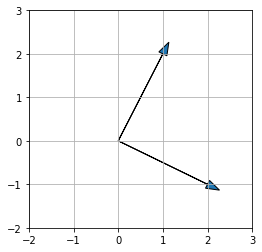

In [0]:
# Plot vectors with matplotlib

fig, ax = plt.subplots(figsize = (4, 4)) # Make sure plot is square
ax.grid()
plt.xlim(-2, 3)
plt.ylim(-2, 3)

for vector in [vector1, vector2]:
  plt.arrow(0,0, vector[0], vector[1], head_width=.2)
plt.show()

# A synonym for orthogonal is perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# Create vectors
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

# Calculate dot product
np.dot(a, b)
             
  
# The dot product != 0 so the vectors are not orthogonal

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# Create vector
c = np.array([2, -15, 6, 20])

# Find square of the norm 
print(np.linalg.norm(c) ** 2)

# Calculate dot product of c and c
print(np.dot(c, c))

# Calculate product of transpose of c and c
print(np.matmul(c.T, c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad\end{align}

### First calculate norm:
\begin{align}
 ||d|| = \sqrt{7^2 + 12^2} = \sqrt{49 + 144} = \sqrt{193} = 13.89...
\end{align}

### Divide d by its norm:
\begin{align}
 \hat{d} = \frac{1}{||d||}d = \frac{1}{13.89...}\begin{bmatrix} 7 \\ 12  \end{bmatrix} = \begin{bmatrix} .50... \\ .86... \end{bmatrix}
\end{align}



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\qquad\end{align}

### First calculate norm:
\begin{align}
 ||e|| = \sqrt{2^2 + 11^2 + (-8)^2} = \sqrt{4 + 121 + 64} = \sqrt{189} = 13.74...
\end{align}

### Divide e by its norm:
\begin{align}
 \hat{e} = \frac{1}{||e||}e = \frac{1}{13.74...}\begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = \begin{bmatrix} .14... \\ .80... \\ -0.58... \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# Create vector 
f = np.array([4, 12, 11, 9, 2])

# Find the norm
f_norm = np.linalg.norm(f)

# Divide vector by norm
f_unit = f / f_norm
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(0, 10)

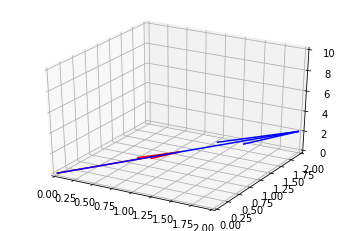

In [0]:
# Create linearly dependent vectors
vector3 = [1, 1, 1]
vector4 = [2, 2, 2]


from mpl_toolkits.mplot3d import Axes3D

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, vector3[0], vector3[1], vector3[2], length = 1, color='red')
ax.quiver(0, 0, 0, vector4[0], vector4[1], vector4[2], length = 1, color='blue')

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(0, 10)


(0, 10)

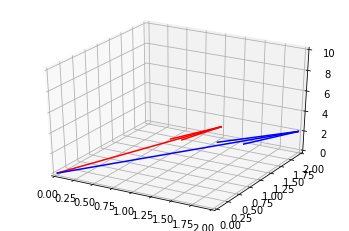

In [0]:
# Create linearly independent vectors
vector3 = [1, 2, 1]
vector4 = [2, 2, 2]


from mpl_toolkits.mplot3d import Axes3D

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, vector3[0], vector3[1], vector3[2], length = 1, color='red')
ax.quiver(0, 0, 0, vector4[0], vector4[1], vector4[2], length = 1, color='blue')

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(0, 10)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

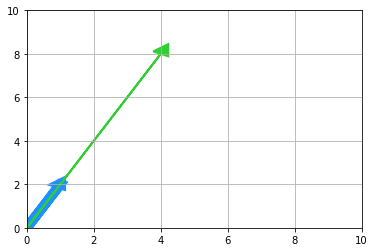

In [0]:
# Create vectors
g = np.array([1, 2])
h = np.array([4, 8])

# Graph to show linear dependence
fig, ax = plt.subplots()
ax.grid()
plt.xlim(0, 10)          
plt.ylim(0, 10)

plt.arrow(0,0, g[0], g[1],
          head_width=.05, 
          head_length=0.05, 
          linewidth=10,
          color ='dodgerblue')

plt.arrow(0,0, h[0], h[1],
          head_width=.5, 
          head_length=0.5, 
          linewidth=2,
          color ='limegreen')

plt.show;

# Because these vectors are linearly dependent, the only vectors within the span
# lie along that line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

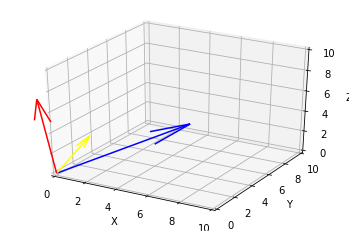

[array([11, 26, 23]), array([23, 56, 59]), array([35, 86, 95])]

In [0]:
# Create vectors 
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])


# Graph vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, l[0], l[1], l[2], length=1, color='yellow')
ax.quiver(0, 0, 0, m[0], m[1], m[2], length=1, color='red')
ax.quiver(0, 0, 0, n[0], n[1], n[2], length=1, color='blue')

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Because these vectors are not co-planar, their span is all 3d space
# Here are some vectors in that space, just for good measure

muchos_combos = []
for (a, b, c) in [(1, 2, 3), (4, 5, 6), (7, 8, 9)]:
  linear_combo = np.multiply(l, a) + np.multiply(m, b) + np.multiply(n, c)
  muchos_combos.append(linear_combo)
  
muchos_combos

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



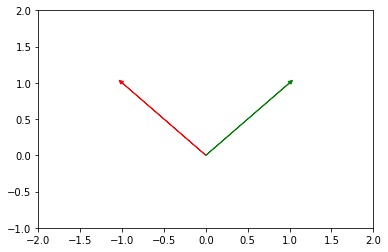

In [0]:
# Find basis vectors in 2d
o = np.array([-1, 1])
p = np.array([1, 1])

# Plot vectors
plt.arrow(0,0, o[0], o[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, p[0], p[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-2,2)          
plt.ylim(-1,2)

plt.show()

## 6.2 What does it mean to form a basis?

Vectors form a basis for a space if they are linearly independent and span that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# Create matrix

P = np.array([
    [1, 2, 3],
    [-1, 0, 7],
    [4, 8, 2]
])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns. The rank of the obove matrix is 3 so the matrix spans 3d space.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/234a46206d76de37cb26309c7b13f93d9feff96c)

In [0]:
# Create vectors 
v = np.array([1, 3])
w = np.array([-1, 2])

# Get required dot products
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

# Get projection
fraction = w_dot_v / v_dot_v
projection = fraction * v

projection




array([0.5, 1.5])

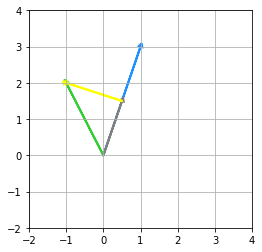

In [0]:
# Plot

x_minus_proj = w-projection
fig, ax = plt.subplots(figsize = (4, 4))
ax.grid()
plt.xlim(-2, 4)          
plt.ylim(-2, 4)

plt.arrow(0,0, v[0], v[1],
          head_width=.1, 
          head_length=0.1, 
          linewidth=2,
          color ='dodgerblue')

plt.arrow(0,0, w[0], w[1],
          head_width=.1, 
          head_length=0.1, 
          linewidth=2,
          color ='limegreen')

plt.arrow(0,0, projection[0], projection[1],
          head_width=.1, 
          head_length=0.1, 
          linewidth=2,
          color ='gray')

plt.arrow(projection[0],projection[1], x_minus_proj[0], x_minus_proj[1],
          head_width=.1, 
          head_length=0.1, 
          linewidth=2,
          color ='yellow')


plt.show;



# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

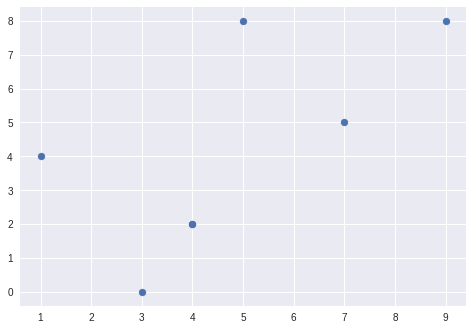

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()